# Exploring Red Wine Quality

## By Zoe Kahana

### 1. Citation

This dataset is public available for research. The details are described in [Cortez et al., 2009].

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016 [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

### 2. About Dataset

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

For this program, I will be using only the red wine dataset.

### 3. Number of Instances

1599

### 4. Number of Attributes

11 + output variable

### 5. Attribute Information

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):

1. Fixed Acidity (tartaric acid - g / dm^3)

2. Volatile Acidity (acetic acid - g / dm^3)

3. Citric Acid (g / dm^3)

4. Residual Sugar (g / dm^3)

5. Chlorides (sodium chloride - g / dm^3

6. Free Sulfur Dioxide (mg / dm^3)

7. Total Sulfur Dioxide (mg / dm^3)

8. Density (g / cm^3)

9. pH

10. Sulphates (potassium sulphate - g / dm3)

11. Alcohol (% by volume)

Output variable (based on sensory data):

1. Quality (score between 0 and 10)

### 6. Defining Variables

1. Fixed Acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. Volatile Acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. Citric Acid: found in small quantities, citric acid can add ‘freshness’ and flavor to wines
4. Residual Sugar: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. Chlorides: the amount of salt in the wine
6. Free Sulfur Dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. Total Sulfur Dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. Density: the density of water is close to that of water depending on the percent alcohol and sugar content
9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. Sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
11. Alcohol: the percent alcohol content of the wine
12. Quality: output variable (based on sensory data, score between 0 and 10)

## Analysis

In [1]:
# imports libraries needed
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

# import supplementary visuals from project root folder
import visuals as vs

# nice display for notebooks
%matplotlib inline

In [2]:
# load in red wine dataset
data = pd.read_csv("winequality-red.csv", sep=';')

# display the first five entries
display(data.head(n = 5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# confirm no data is missing
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

### Examining the Distribution of the Output Variable

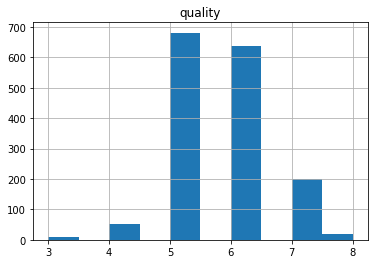

In [4]:
# examing distribution via histogram
hist = data.hist(column = "quality")

It appears there are only wines of a quality between 3 and 8 in this dataset with most of the wines being of quality rating 5 or 6.

In [5]:
# finding number of each wine by quality
n_wines = data.shape[0]

quality_three = data.loc[(data["quality"] == 3)]
n_three = quality_three.shape[0]

quality_four = data.loc[(data["quality"] == 4)]
n_four = quality_four.shape[0]

quality_five = data.loc[(data["quality"] == 5)]
n_five = quality_five.shape[0]

quality_six = data.loc[(data["quality"] == 6)]
n_six = quality_six.shape[0]

quality_seven = data.loc[(data["quality"] == 7)]
n_seven = quality_seven.shape[0]

quality_eight = data.loc[(data["quality"] == 8)]
n_eight = quality_eight.shape[0]

# printing results
print("number of wines: {}".format(n_wines))
print("number of wines of quality 3: {}".format(n_three))
print("number of wines of quality 4: {}".format(n_four))
print("number of wines of quality 5: {}".format(n_five))
print("number of wines of quality 6: {}".format(n_six))
print("number of wines of quality 7: {}".format(n_seven))
print("number of wines of quality 8: {}".format(n_eight))

number of wines: 1599
number of wines of quality 3: 10
number of wines of quality 4: 53
number of wines of quality 5: 681
number of wines of quality 6: 638
number of wines of quality 7: 199
number of wines of quality 8: 18


### Examining the Attribute Variables

In [6]:
# five number summaries of variables and other analysis
display(np.round(data.describe(), decimals = 2))
print(data.index[data['quality'] == 8].tolist())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


[267, 278, 390, 440, 455, 481, 495, 498, 588, 828, 1061, 1090, 1120, 1202, 1269, 1403, 1449, 1549]


Once again, we see that there are no wines with a rating of below 3 or above 8.

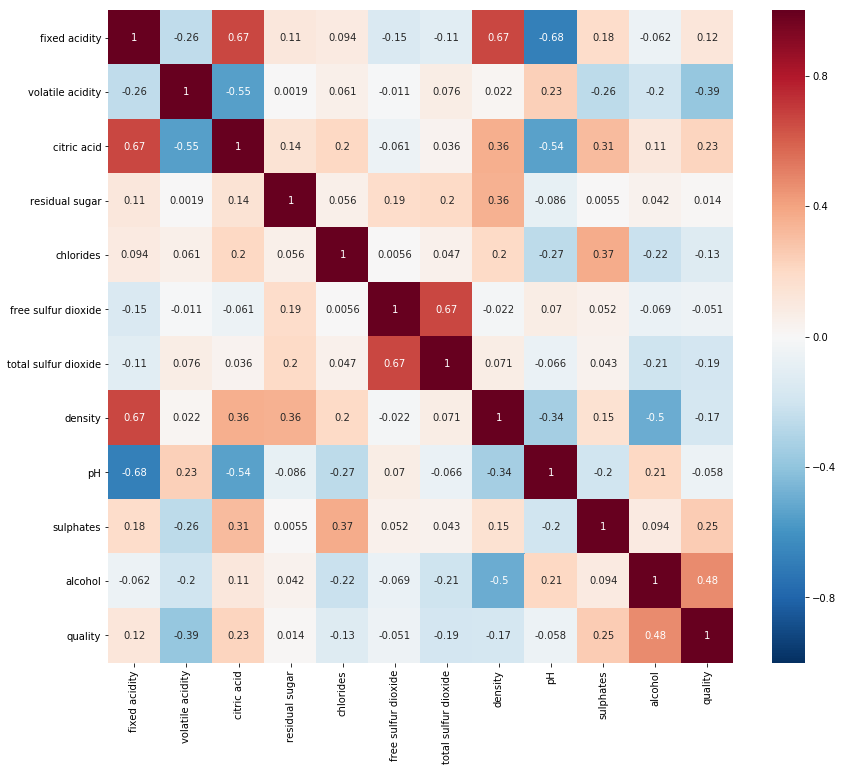

In [7]:
# plot co-relations between variables
correlation = data.corr()
plt.figure(figsize = (14, 12))
heatmap = sns.heatmap(correlation, annot = True, linewidths = 0, vmin = -1, cmap = "RdBu_r")

The following variable pairs appear to have a strong positive correlation:
1. Free Sulfur Dioxide and Total Sulfur Dioxide
2. Fixed Acidity and Citric Acid
3. Fixed Acidity and Density

The following variable pairs appear to have a strong negative correlation:
1. Fixed Acidity and pH
2. Citric Acid and Volatile Acidity
3. Citric Acid and pH
4. Alcohol and Density

Alcohol has the greatest positive correlation with quality and volatile acidity has the greatest negative correlation with quality.

#### Free Sulfur Dioxide and Total Sulfur Dioxide
When looking at the definition of total sulfur dioxide, it is clear that a positive correlation should exist between the two variables as total sulfur dioxide measures the amount of free and bound sulfur dioxide. Therefore, as free sulfur dioxide increases, it follows that total sulfur dioxide should increase as well, resulting in a positive correlation.

#### Fixed Acidity and Citric Acid

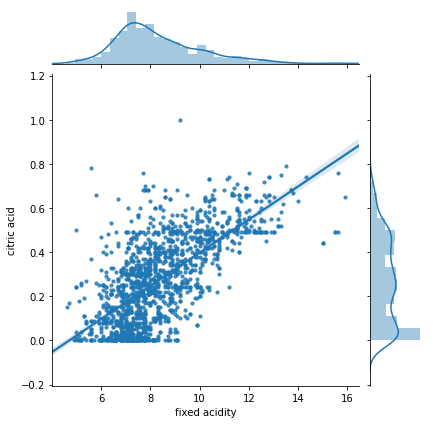

In [8]:
# create dataframe containing only fixed acidity and citric acid
fixedAcid_citricAcid = data[['fixed acidity', 'citric acid']]

# initialize joint-grid with dataframe using seaborn library
gridA = sns.JointGrid(x = "fixed acidity", y = "citric acid", data = fixedAcid_citricAcid, size = 6)

# draws regression plot in grid
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

# draws distribution plot in same grid
gridA = gridA.plot_marginals(sns.distplot)

As the amount of citric acid increases, so do the fixed acidity levels.

#### Fixed Acidity and Density

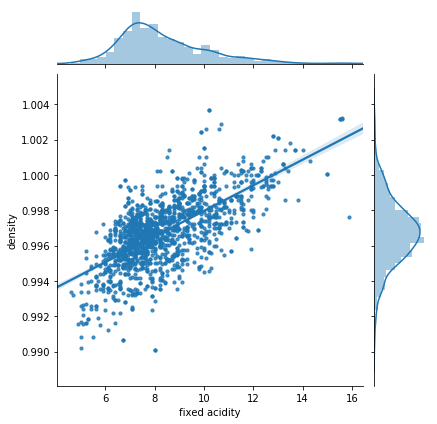

In [9]:
# create dataframe containing only fixed acidity and density
fixedAcid_dens = data[['fixed acidity', 'density']]

# initialize joint-grid with dataframe using seaborn library
gridA = sns.JointGrid(x = "fixed acidity", y = "density", data = fixedAcid_dens, size = 6)

# draws regression plot in grid
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

# draws distribution plot in same grid
gridA = gridA.plot_marginals(sns.distplot)

Density is highly correlated with fixed acidity and increases as fixed acidity increases. As we have already established, fixed acidity increases with citric acid. Citric acid has a density of 1.66 g/cm^3, so it is plausible that density increases with an increase in citric acid content.

#### Fixed Acidity and pH

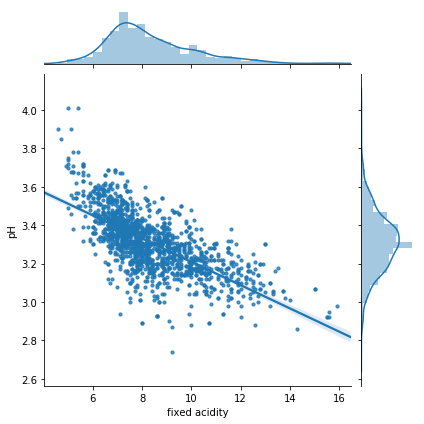

In [10]:
# create dataframe containing only fixed acidity and pH
fixedAcid_pH = data[['fixed acidity', 'pH']]

# initialize joint-grid with dataframe using seaborn library
gridA = sns.JointGrid(x = "fixed acidity", y = "pH", data = fixedAcid_pH, size = 6)

# draws regression plot in grid
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

# draws distribution plot in same grid
gridA = gridA.plot_marginals(sns.distplot)

pH decreases as fixed acidity increases, as a lower pH level is an indicator of high acidity levels.

#### Citric Acid and Volatile Acidity

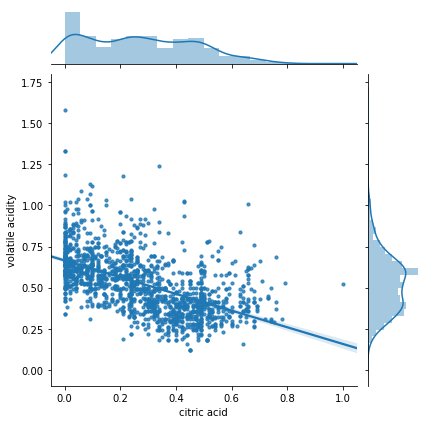

In [11]:
# create dataframe containing only citric acid and volatile acidity
citricAcid_volatileAcid = data[['citric acid', 'volatile acidity']]

# initialize joint-grid with dataframe using seaborn library
gridA = sns.JointGrid(x = "citric acid", y = "volatile acidity", data = citricAcid_volatileAcid, size = 6)

# draws regression plot in grid
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

# draws distribution plot in same grid
gridA = gridA.plot_marginals(sns.distplot)

It appears that as citric acid levels increase, volatile acidity decreases.

#### Alcohol and Density

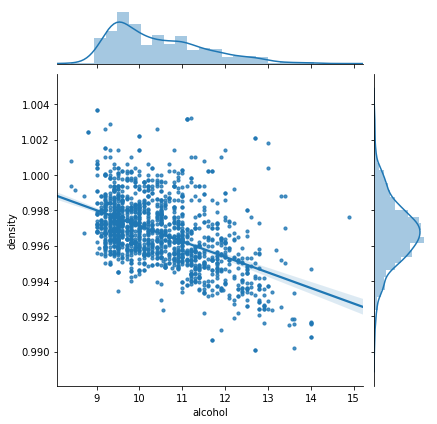

In [12]:
# create dataframe containing only alcohol and density
alcohol_dens = data[['alcohol', 'density']]

# initialize joint-grid with dataframe using seaborn library
gridA = sns.JointGrid(x = "alcohol", y = "density", data = alcohol_dens, size = 6)

# draws regression plot in grid
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

# draws distribution plot in same grid
gridA = gridA.plot_marginals(sns.distplot)

As ABV levels increase, density decreases. This is plausible, since ethanol is less dense than water, so as the percent of alcohol by volume increases, the percent of water decreases and so does the density.

#### Volatile Acidity and Quality

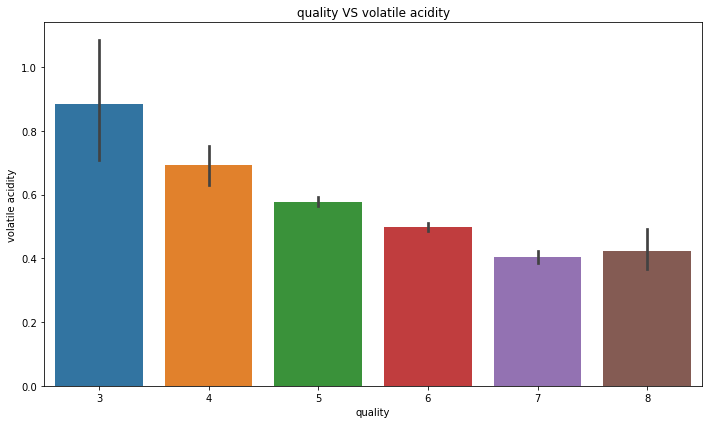

In [13]:
# create dataframe containing only volatile acidity and quality
volatileAcid_quality = data[['volatile acidity', 'quality']]

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
# creates bar plot of quality vs. volatile acidity
sns.barplot(x='quality', y='volatile acidity', data=volatileAcid_quality, ax=axs)


plt.title('quality VS volatile acidity')
plt.tight_layout()
plt.show()

Higher quality is usually associated with lower volatile acidity levels. This is consistent with our knowledge of volatile acidity, where high levels can lead to an unpleasant taste.

#### Alcohol and Quality

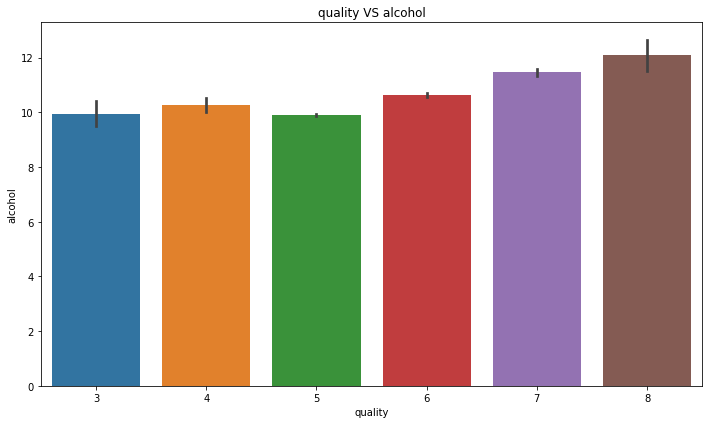

In [14]:
# create dataframe containing only alcohol and quality
alcohol_quality = data[['alcohol', 'quality']]

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
# creates bar plot of quality vs. alcohol
sns.barplot(x='quality', y='alcohol', data=alcohol_quality, ax=axs)


plt.title('quality VS alcohol')
plt.tight_layout()
plt.show()

Quality tends to increase as alcohol by volume levels increase. It appears that wine drinkers prefer wine with a higher ABV level, as they feel some of the effects of inebriation.

### Identifying Outliers

In [15]:
# keeps record of outlier indices
outliers = []

# goes through each feature
for feature in data.keys():

    # find 1st quartile value for feature
    Q1 = np.percentile(data[feature], q=25)
 
    # find 3rd quartile value for feature
    Q3 = np.percentile(data[feature], q=75)
 
    # calculate IQR (Q3 - Q1) and maximum allowed difference
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
 
    # display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])

Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
134,7.9,1.040,0.05,2.20,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.200000,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.200000,5
18,7.4,0.590,0.08,4.40,0.086,6.0,29.0,0.99740,3.38,0.50,9.000000,4
33,6.9,0.605,0.12,10.70,0.073,40.0,83.0,0.99930,3.45,0.52,9.400000,6
35,7.8,0.645,0.00,5.50,0.086,5.0,18.0,0.99860,3.40,0.55,9.600000,6
39,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5
55,7.7,0.620,0.04,3.80,0.084,25.0,45.0,0.99780,3.34,0.53,9.500000,5


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
17,8.1,0.560,0.28,1.70,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
42,7.5,0.490,0.20,2.60,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6
81,7.8,0.430,0.70,1.90,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.80,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
106,7.8,0.410,0.68,1.70,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,5
109,8.1,0.785,0.52,2.00,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
57,7.5,0.630,0.12,5.10,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5
396,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
497,7.2,0.340,0.32,2.50,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
522,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
584,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,7
634,7.9,0.350,0.21,1.90,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
678,8.3,0.780,0.10,2.60,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
90,7.9,0.520,0.26,1.9,0.079,42.0,140.0,0.99640,3.23,0.54,9.5,5
91,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
130,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,9.4,5
145,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
294,13.3,0.340,0.52,3.20,0.094,17.0,53.0,1.00140,3.05,0.81,9.500000,6
324,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,6
325,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,6
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,5
354,6.1,0.210,0.40,1.40,0.066,40.5,165.0,0.99120,3.25,0.59,11.900000,6
364,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
366,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
374,14.0,0.410,0.63,3.80,0.089,6.0,47.0,1.00140,3.01,0.81,10.800000,6


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
151,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
268,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
276,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
544,14.3,0.310,0.74,1.80,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
554,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
43,8.1,0.660,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,4
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
91,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6
1132,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.600000,7
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.80,8
278,10.3,0.320,0.45,6.40,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
481,9.4,0.300,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
498,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3


## Running Regressions

### Initializing 3 Supervised Learning Algorithms

In [16]:
# import supervised learning algorithms from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# initializing the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(max_depth=None, random_state=None)
clf_D = KNeighborsClassifier()

### Creating a Method for Model Training

In [17]:
# Import two classification metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict_evaluate(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
     - learner: the learning algorithm to be trained and predicted on
     - sample_size: the size of samples (number) to be drawn from training set
     - X_train: features training set
     - y_train: quality training set
     - X_test: features testing set
     - y_test: quality testing set
    '''
    
    results = {}
    
    """
    Fit/train the learner to the training data using slicing with 'sample_size' 
    using .fit(training_features[:], training_labels[:])
    """
    start = time() # Get start time of training
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size]) #Train the model
    end = time() # Get end time of training
    
    # Calculate the training time
    results['train_time'] = end - start
    
    """
    Get the predictions on the first 300 training samples(X_train), 
    and also predictions on the test set(X_test) using .predict()
    """
    start = time() # Get start time
    predictions_train = learner.predict(X_train[:300])
    predictions_test = learner.predict(X_test)
    
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F1-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='micro')
        
    # Compute F1-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Splitting Data

In [18]:
# Split the data into features and target label
quality_raw = data['quality']
features_raw = data.drop(['quality'], axis = 1)

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1279 samples.
Testing set has 320 samples.


### Training Models and Observing Performance

GaussianNB trained on 12 samples.
GaussianNB trained on 127 samples.
GaussianNB trained on 1279 samples.
DecisionTreeClassifier trained on 12 samples.
DecisionTreeClassifier trained on 127 samples.
DecisionTreeClassifier trained on 1279 samples.
RandomForestClassifier trained on 12 samples.
RandomForestClassifier trained on 127 samples.
RandomForestClassifier trained on 1279 samples.
KNeighborsClassifier trained on 12 samples.
KNeighborsClassifier trained on 127 samples.
KNeighborsClassifier trained on 1279 samples.


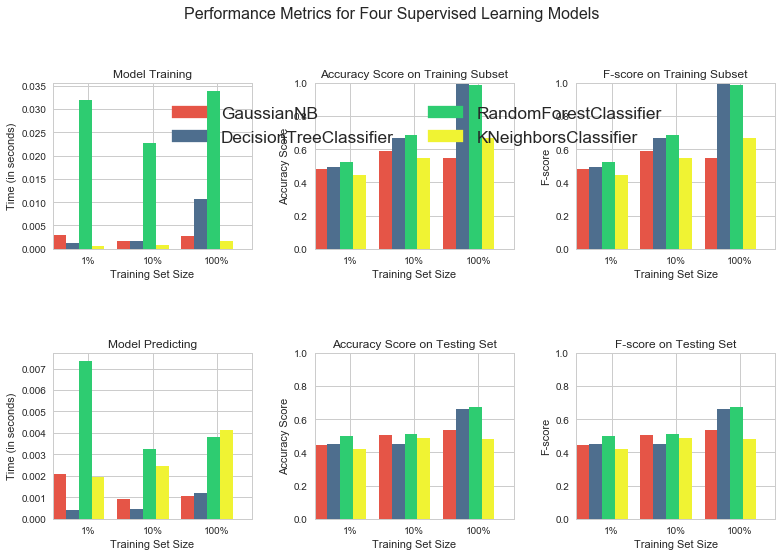

In [20]:
# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100

samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict_evaluate(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the four supervised learning models chosen
vs.visualize_classification_performance(results)

It is apparent here that the Gaussian Naive Bayes and k-Nearest Neighbors algorithms did not perform as well as Decision Trees or Random Forests. This may be because GaussianNB assumes independence between features, and many features, such as fixed acidity and citric acid, are not independent. k-Nearest Neighbors may be less accurate due to the need to adjust k as well as the fact that k-Nearest Neighbors weights all predictive variables equally.

For the purposes of this model, we will proceed with the Random Forest Classifier.

### Feature Importances

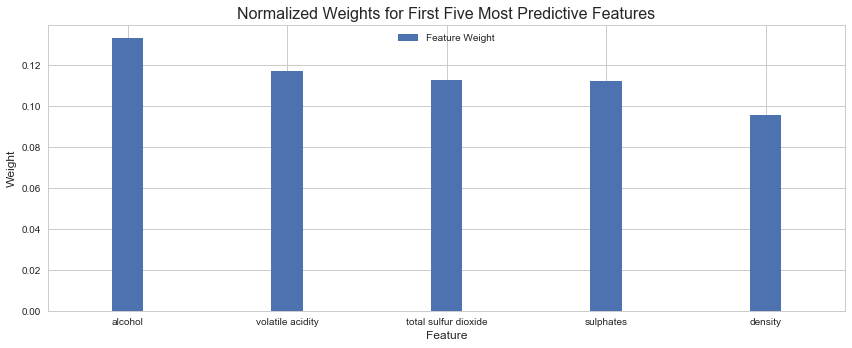

In [30]:
# Import a supervised learning model that has 'feature_importances_'
model = RandomForestClassifier(max_depth=None, random_state=None)

# Train the supervised model on the training set using .fit(X_train, y_train)
model = model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

As shown by the graph above, alcohol seems to be the most influential feature, followed by volatile acidity, total sulfur dioxide, sulphates, and density.

### Hyperparameter tuning for Random Forest

In [36]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier(max_depth=None, random_state=None)

# Create the parameters or base_estimators list you wish to tune, using a dictionary if needed.
# Example: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

"""
n_estimators: Number of trees in the forest
max_features: The number of features to consider when looking for the best split
max_depth: The maximum depth of the tree
"""
parameters = {'n_estimators': [10, 20, 30], 'max_features':[3,4,5, None], 'max_depth': [5,6,7, None]}

# make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5, average="micro")

# perform grid search on the claszsifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5, average="micro")))
print("\nOptimized Model\n------")
print(best_clf)
print("\nFinal accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,  average="micro")))

Unoptimized model
------
Accuracy score on testing data: 0.7156
F-score on testing data: 0.7156

Optimized Model
------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Final accuracy score on the testing data: 0.7312
Final F-score on the testing data: 0.7312


As shown above, tuning the hyperparameters increased the accuracy of the model.

In [44]:
"""Give inputs in this order: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide,
total sulfur dioxide, density, pH, sulphates, alcohol

"""
wine_data = [[11.2, 0.28, 0.56, 1.9, 0.075, 17, 60, 0.9980, 3.16, 0.58, 9.8],
            [8.5, 0.28, 0.56, 1.8, 0.092, 35, 103, 0.9969, 3.3, 0.75, 10.5 ],
            [7.4, 2, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 0.6]]
               
# Show predictions
for i, quality in enumerate(best_clf.predict(wine_data)):
    print("Predicted quality for Wine {} is: {}".format(i+1, quality))

Predicted quality for Wine 1 is: 6
Predicted quality for Wine 2 is: 7
Predicted quality for Wine 3 is: 5
